In [1]:
#in this project we will be perfoming kernel PCA for the full moom dataset by use of nystrom extension


In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#then we import the make moons function from sklearn library to generate the dataset
from sklearn.datasets import make_moons


In [3]:
#now we make moons dataset with a total of 2000 samples and the noise of std=0.1 as per the documentation as below
X,y=make_moons(n_samples=2000,noise=0.1)

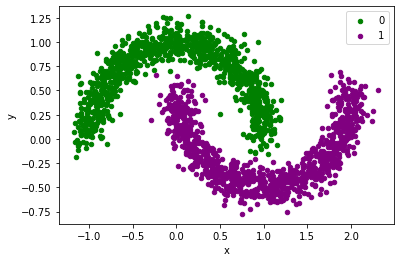

In [4]:
#now that we have the moon dataset generated,next up we can plot it for better visualization

#there we go

df=pd.DataFrame(dict(x=X[:,0],y=X[:,1],label=y))
colors={0:'green',1:'purple'}
figure,ax=plt.subplots()
grouped_df=df.groupby('label')
for i,j in grouped_df:
  j.plot(ax=ax,kind='scatter',x='x',y='y',label=i,color=colors[i])
plt.show()


In [5]:
#using sklearn train_test_split function to split the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
target_var=df.label
df.drop(['label'],axis=1,inplace=True)
y=target_var
x=df

In [6]:
#applying kernel PCA on the first dataset
from sklearn.decomposition import KernelPCA
kpca1 = KernelPCA(n_components=500, kernel='linear')
X_transformed_1 = kpca1.fit_transform(X)
X_transformed_1.shape

(2000, 500)

In [7]:
#sampling the left moon dataset
#so basically we will be using the Kmeans function to cluster the 2 moon dataset into 2,left and right cluster to represent the left and right
#moon dataset
#afterwards we will then perfom a random sampling for 500 points on the left moon 
#then we finally perfom kernelPCA for the entire dataset with the use of nystrom extension,similary to the part (1) dataset


#clustering to only perfom the sampling on the left moon dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
X_clustered = kmeans.fit_transform(X)

#now that the 2 moon dataset is clustered into left and right moon,then we can proceed to apply the kernelPCA ,then afterwards nystrom extension

In [8]:
#importing the neccesary library
#applying the kernelPCA on the left moon dataset and then randomly sampling 500 (this is defined by n_components=500) buh this is 
#strickly on the left moon data
kpca2 = KernelPCA(n_components=500, kernel='linear')
X_transformed_2 = kpca2.fit_transform(X_clustered)
X_transformed_2.shape

(2000, 500)

In [9]:
#we now gonna apply the nystrom extension on both generated datasets ,end goal is to plot the first 2 components for both results 
#there we go
from sklearn import svm
from sklearn.kernel_approximation import Nystroem  #this is the nystrom extension function from the sklearn library we gonna be using
new_data1 = X_transformed_1 / 16.
model1 = svm.LinearSVC()
feature_mapping_nystroem1 = Nystroem(gamma=.20,random_state=1, n_components=500)
new_tranformed_data1 = feature_mapping_nystroem1.fit_transform(new_data1)
model1.fit(new_tranformed_data1, y)
model1.score(new_tranformed_data1, y)

0.8475

In [10]:
#perfoming a similary operation on the 2rd dataset
new_data2= X_transformed_2 / 16.
model2 = svm.LinearSVC()
feature_mapping_nystroem2= Nystroem(gamma=.20,random_state=1,n_components=500)
new_tranformed_data2 = feature_mapping_nystroem2.fit_transform(new_data2)
model2.fit(new_tranformed_data2, y)
model2.score(new_tranformed_data2, y)

0.7545

In [11]:
#we now gonna perfom some visualization of the models perfomance on both datasets

In [12]:
y_pred=model1.predict(new_tranformed_data1)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_pred,y)
cm

array([[848, 153],
       [152, 847]])

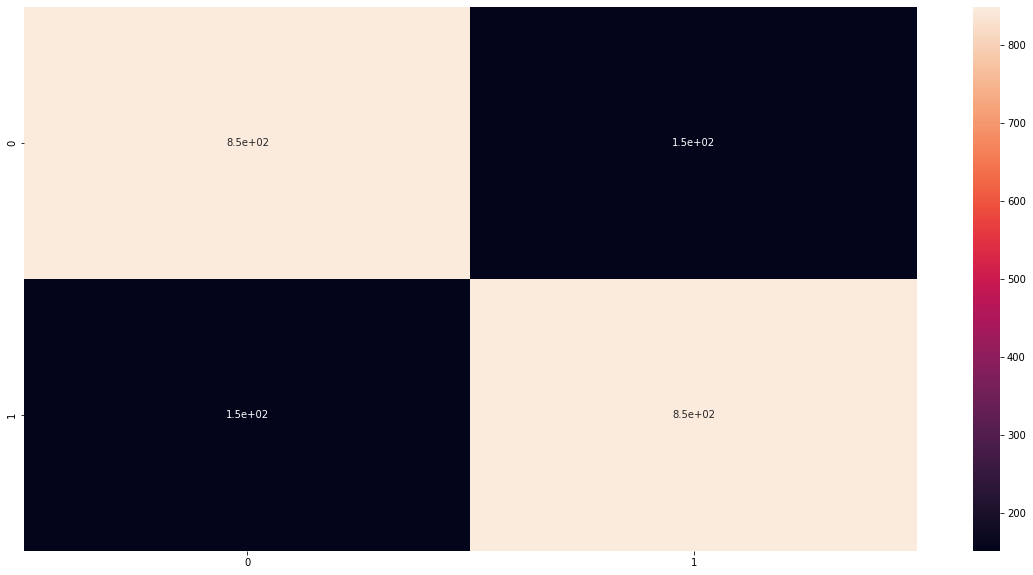

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True)


In [15]:
classification_report(y_pred,y)

'              precision    recall  f1-score   support\n\n           0       0.85      0.85      0.85      1001\n           1       0.85      0.85      0.85       999\n\n    accuracy                           0.85      2000\n   macro avg       0.85      0.85      0.85      2000\nweighted avg       0.85      0.85      0.85      2000\n'

In [16]:
#next up is plotting the first components of the tranformed data for both datasets

#visualizing the first dataset
import plotly.express as px
figure1 = px.scatter(new_tranformed_data1, x=0, y=1)
figure1.show()

In [17]:
#visualizing the 2rd dataset
figure2 = px.scatter(new_tranformed_data2, x=0, y=1)
figure2.show()

In [18]:
#finnaly we gonna be plotting the first 2 principal components for both datasets

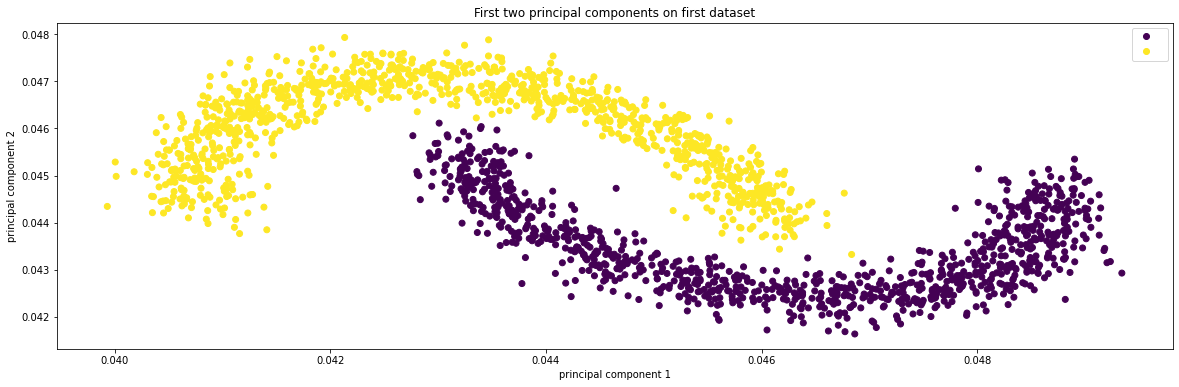

In [19]:
# plotting the  first two principal components  on the first dataset

plt.figure(figsize=(20,6))
plot = plt.scatter(new_tranformed_data1[:,0], new_tranformed_data1[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0])
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.title("First two principal components on first dataset")
plt.show()

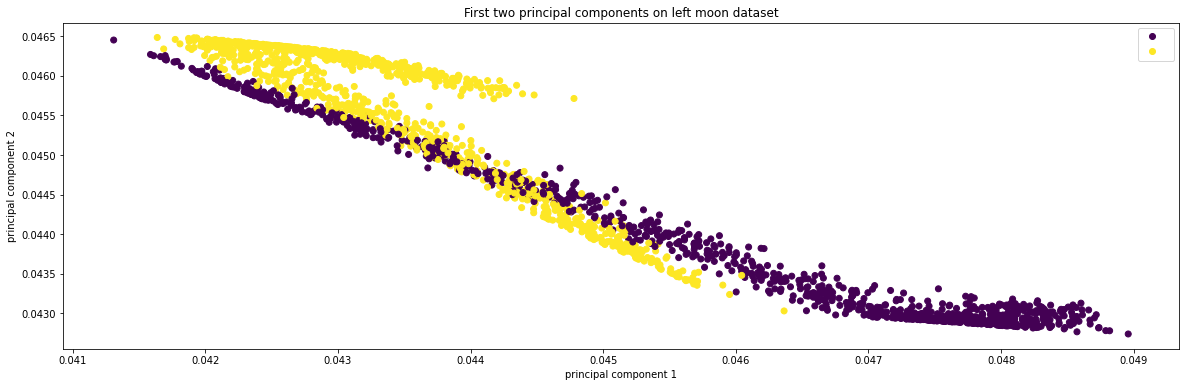

In [20]:
# plotting the  first two principal components  on the second dataset
plt.figure(figsize=(20,6))
plot = plt.scatter(new_tranformed_data2[:,0], new_tranformed_data2[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0])
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.title("First two principal components on left moon dataset")
plt.show()

In [21]:
##so basically  this kernelPCA  is pivotal for dimensionality tranformation as shown in the figures above and thus involves one or even 
#more of smallest principle components which now inturn results into a lower dimensionality projection of the data for which it 
#preserves the maximal data variance
#Thus this dimensionality tranformation is ultimately good enough to encode almost all vital relationships between the points while 
#preserving the overall points relationship

END OF NYSTROM EXTENSION WITH KERNELPCA IMPLEMENTATION ON 2 MOON DATASET. THANK YOU!!!